## Fast MC plotting ##

In [1]:
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

Load the .json file with the Monte Carlo result

In [17]:
#df_vrt = pd.read_json('../mcdata/mc_vrt_noecut_1M.json').dropna()
df_vrt = pd.read_json('Z:/acolijn/mcdata/mc_fiducial_scatter_de2500.0_N1000000_nmax2.json').dropna()
#df_vrt_noform = pd.read_json('../mcdata/mc_reduce_variance_noform.json').dropna()
df_std = pd.read_json('../../mcdata/mc_None_de2500.0_N100000.json').dropna()

Plot the energy distribution for both the standard and for the accelerated MC. For the standard Monte Carlo the same fiducial cuts need to be applied as implemented in the accelerated version.

In [20]:
r2_std = df_std['x']**2+df_std['y']**2
r2_vrt = df_vrt['x']**2+df_vrt['y']**2

df_std_cut = df_std[(df_std['de']<2500) & (r2_std<49**2) & (np.abs(df_std['z'])<99./2.) & (df_std['n']==2)]  
df_vrt_cut = df_vrt[(df_vrt['de']<2500) & (r2_vrt<49**2) & (np.abs(df_vrt['z'])<99./2.) & (df_vrt['n']==2)]  

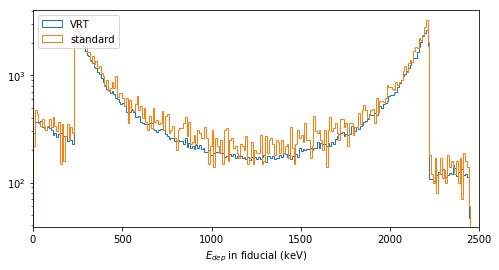

In [22]:
nb = 250
plt.figure(figsize=(8,4))
x_vrt=plt.hist(df_vrt_cut['de'],weights=df_vrt_cut['w'],bins=nb, range=(0,2500), histtype='step')
x_std=plt.hist(df_std_cut['de'],weights=df_std_cut['w']*10,bins=nb, range=(0,2500), histtype='step')
plt.xlim([0,2500])
#plt.ylim([0,0.02])
plt.legend(('VRT','standard'),loc='upper left')
plt.xlabel('$E_{dep}$ in fiducial (keV)')
plt.yscale('log')

In [111]:
print('standard MC total number of events',int(np.sum(df_std_cut['w'])), ' variance = ',x_std[0].std())
print('variance reduced total weight = ',np.sum(df_vrt_cut['w']),' variance = ',x_vrt[0].std())
print('variance ratio = ',x_std[0].std()/x_vrt[0].std())
print('usefull events in accelerated MC = ',len(df_vrt_cut))
print('acceleration factor = ',len(df_vrt_cut)/len(df_std_cut))

standard MC total number of events 13037  variance =  56.991351063121854
variance reduced total weight =  11578.119077320898  variance =  53.04331467509334
variance ratio =  1.0744304237435283
usefull events in accelerated MC =  88262
acceleration factor =  6.770115824192683


NameError: name 'df_vrt_noform' is not defined

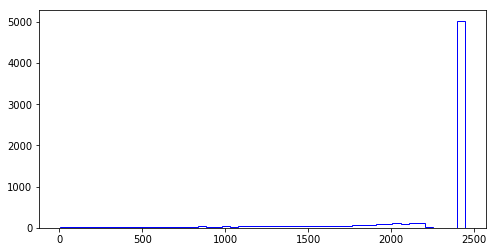

In [29]:
nb = 50
plt.figure(figsize=(8,4))
plt.hist(df_vrt['de'],weights=df_vrt['w'],bins=nb, histtype='step', color='blue')
plt.hist(df_vrt_noform['de'],weights=df_vrt_noform['w'],bins=nb, histtype='step', color='green', linestyle='dashed')

plt.xlabel('$E_{dep}$ in fiducial (keV)')
plt.yscale('log')
plt.legend(('with form factor','without form factor'))